# Time series analysis
### All tasks are performed below

In [ ]:
#let us import all packages needed and all datasets
import pandas as pd
import matplotlib.pyplot as mtp
import sklearn as sk
import numpy as np

In [ ]:
#reading data of different sets into pandas dataframe variables
cp1=pd.read_csv('EURUSD_historical_data.csv')
cp2=pd.read_csv('USDJPY_historical_data.csv')
cp3=pd.read_csv('EURJPY_historical_data.csv')
# We have a problem here in reading datasets through csv function which is,the names of columns are altered with names of columns pointing differnt column data so if we print any dataset now directly then we have data of "open" under "date" and soon misleading the analysis.
# so we change the names of the columns with respective information
# for first dataset
cp1['Datee']=cp1.index
cp1.reset_index(drop=True, inplace=True)
del cp1['Change(%)']
cp1.set_axis(['Open','High','Low','Close','Change(Pips)','Change(%)','Date'], axis=1, inplace=True)
# for second dataset
cp2['Datee']=cp2.index
cp2.reset_index(drop=True, inplace=True)
del cp2['Change(%)']
cp2.set_axis(['Open','High','Low','Close','Change(Pips)','Change(%)','Date'], axis=1, inplace=True)
# for third dataset
cp3['Datee']=cp3.index
cp3.reset_index(drop=True, inplace=True)
del cp3['Change(%)']
cp3.set_axis(['Open','High','Low','Close','Change(Pips)','Change(%)','Date'], axis=1, inplace=True)
print(cp1.head(5))
print(cp2.head(5))
print(cp3.head(5))

      Open     High      Low    Close  Change(Pips)  Change(%)  \
0  1.18466  1.18494  1.18449  1.18473           0.7       0.01   
1  1.18471  1.18478  1.18459  1.18463          -0.8      -0.01   
2  1.18438  1.18478  1.18436  1.18471           3.3       0.03   
3  1.18422  1.18426  1.18406  1.18426           0.4       0.00   
4  1.18454  1.18464  1.18415  1.18424          -3.0      -0.03   

               Date  
0  07/09/2021 00:00  
1  07/08/2021 23:45  
2  07/08/2021 23:30  
3  07/08/2021 23:15  
4  07/08/2021 23:00  
      Open     High      Low    Close  Change(Pips)  Change(%)  \
0  109.806  109.878  109.791  109.839           3.3       0.03   
1  109.826  109.845  109.778  109.803          -2.3      -0.02   
2  109.818  109.833  109.807  109.822           0.4       0.00   
3  109.817  109.828  109.808  109.810          -0.7      -0.01   
4  109.778  109.825  109.776  109.815           3.7       0.03   

               Date  
0  07/09/2021 00:00  
1  07/08/2021 23:45  
2  07/08

<AxesSubplot:xlabel='Date'>

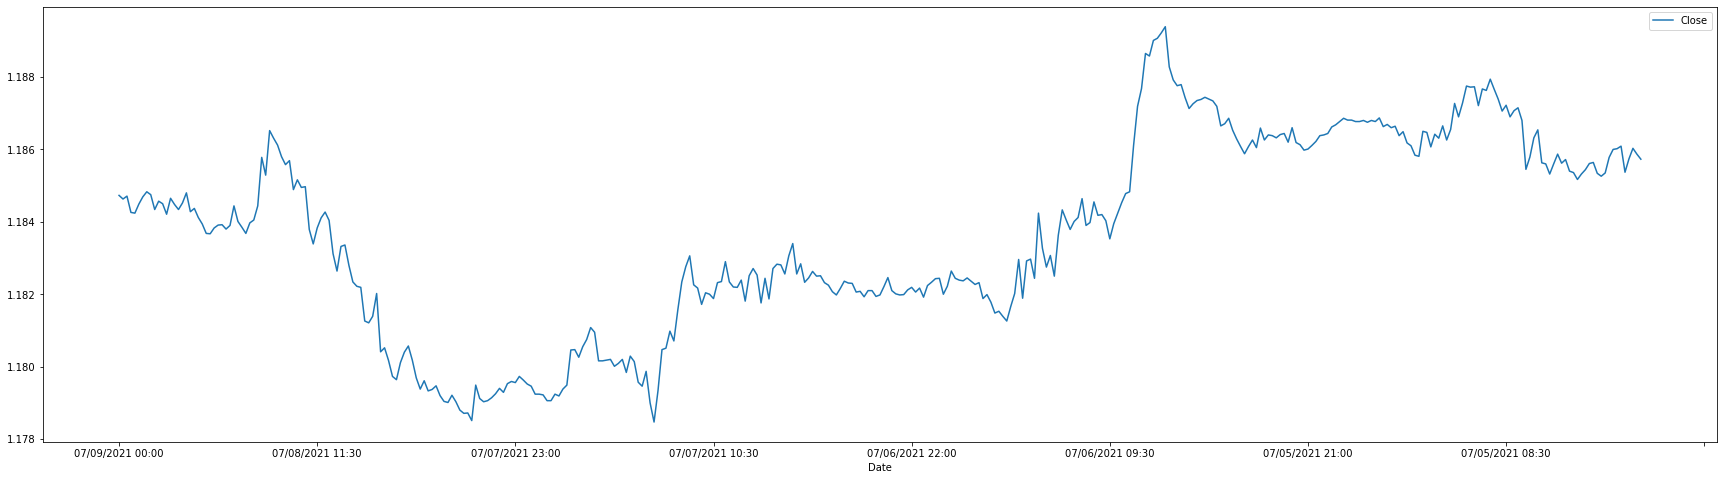

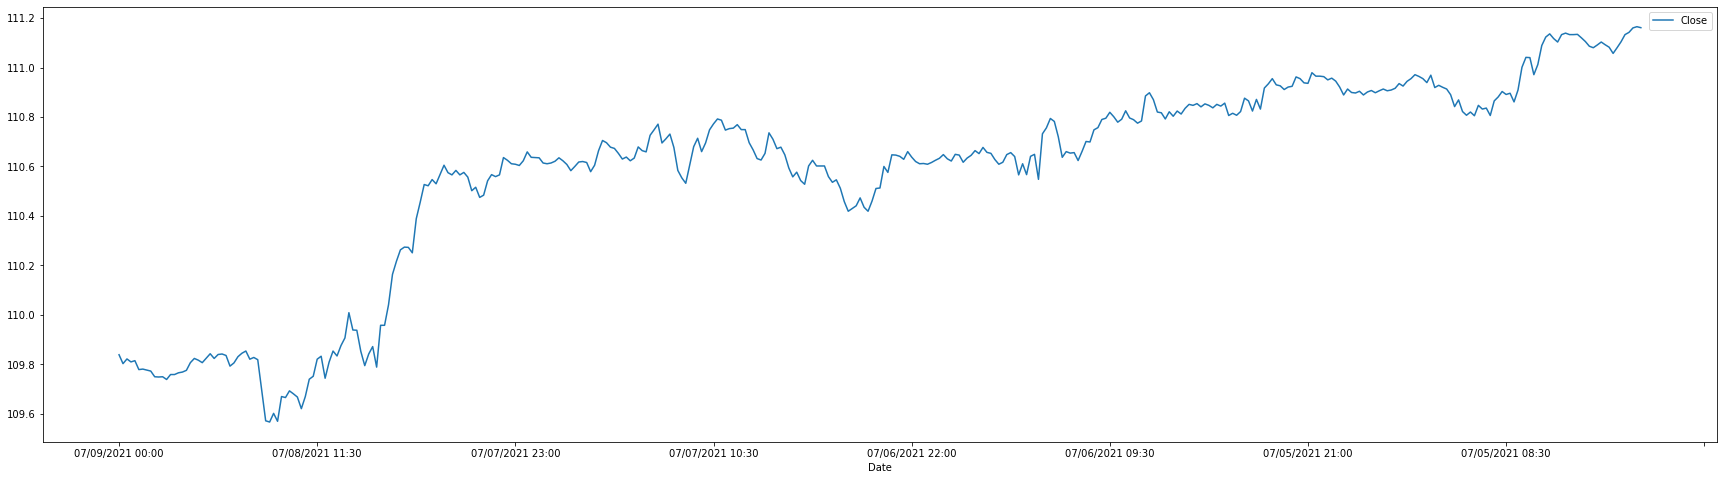

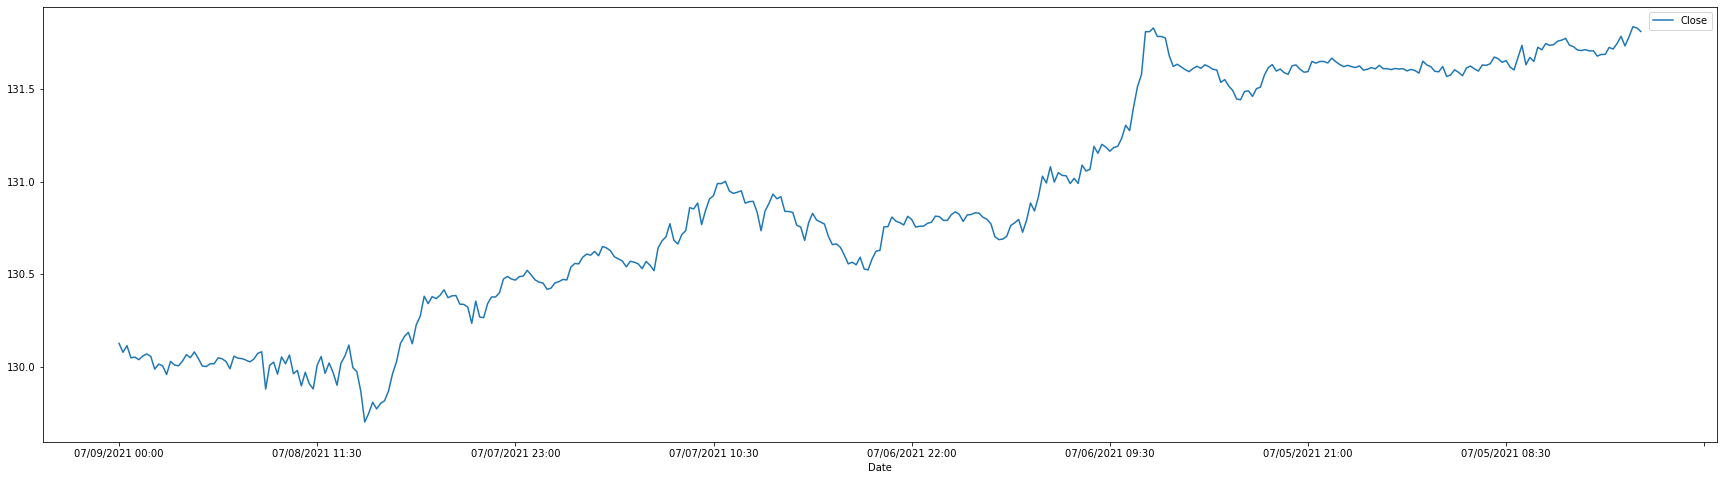

In [ ]:
#visualization of datasets as plots before normalizing
cp1.plot(x='Date', y='Close', figsize=(30,8))
cp2.plot(x='Date', y='Close', figsize=(30,8))
cp3.plot(x='Date', y='Close', figsize=(30,8))
#consider other figsize for better visualization

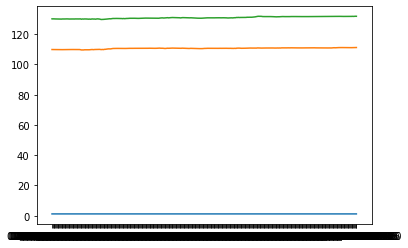

In [ ]:
#ploting three datasets on same graph before normalizing
mtp.plot(cp1['Date'], cp1['Close'])
mtp.plot(cp2['Date'], cp2['Close'])
mtp.plot(cp3['Date'], cp3['Close'])

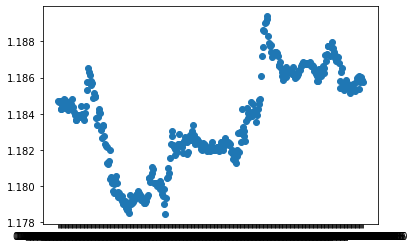

In [ ]:
#ploting histogram graph as it gives more scope for time series datasets before normalizing
mtp.scatter(cp1['Date'], cp1['Close'])

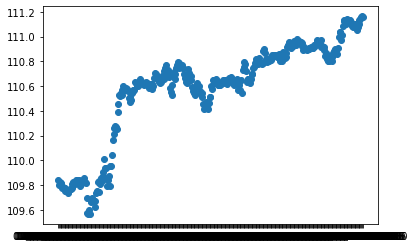

In [ ]:
#ploting histogram graph as it gives more scope for time series datasets before normalizing
mtp.scatter(cp2['Date'], cp2['Close'])

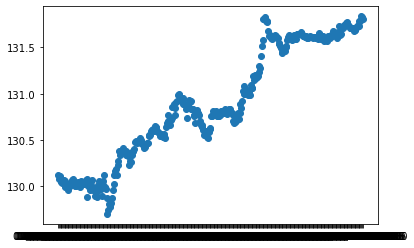

In [ ]:
#ploting histogram graph as it gives more scope for time series datasets before normalizing
mtp.scatter(cp3['Date'], cp3['Close'])

## 1.Normalizing datasets for better insighths and better analysis
### we have many ways to normalize the datasets like:  
                                
                                
1.using transform function in minmax scaler from preprocessing in sklearn

2.using preprocessing.normalize function in sklearn

3.using manual formula method

4.we can use heston method to normalize

*generally we use heston method for finance cases.

*The best one among them is third method because for time series data, we can't use minmax scaler as it normalizes all columns and raises an error for date column.

*Normalizing datasets using other methods like preprocessing.normalize, minmax scaler is very easy by following steps in sklearn documentation as we just need to copy and paste the code, though it is very easy, they are not so effective for analysing data.



NOTE: I can use heston method for normalizing three datasets but since you did not mention what method to use, I used manual method. If you intimate me, I can perform normalization using heston on all three datasets

In [ ]:
scaled_cp1=cp1
scaled_cp2=cp2
scaled_cp3=cp3

In [ ]:
#normalizing using formula method on column "close" as you instructed to conduct analysis on "close" column
#Note: we can use any other column to normalize, but as you instructed I used "close" column.
scaled_cp1['Close'] = (cp1['Close']-min(cp1['Close']))/(max(cp1['Close'])-min(cp1['Close']))
scaled_cp2['Close'] = (cp2['Close']-min(cp2['Close']))/(max(cp2['Close'])-min(cp2['Close']))
scaled_cp3['Close'] = (cp3['Close']-min(cp3['Close']))/(max(cp3['Close'])-min(cp3['Close']))
scaled_cp1

,Open,High,Low,Close,Change(Pips),Change(%),Date
0,1.18466,1.18494,1.18449,0.573260,0.7,0.01,07/09/2021 00:00
1,1.18471,1.18478,1.18459,0.564103,-0.8,-0.01,07/08/2021 23:45
2,1.18438,1.18478,1.18436,0.571429,3.3,0.03,07/08/2021 23:30
3,1.18422,1.18426,1.18406,0.530220,0.4,0.00,07/08/2021 23:15
4,1.18454,1.18464,1.18415,0.528388,-3.0,-0.03,07/08/2021 23:00
...,...,...,...,...,...,...,...
380,1.18571,1.18582,1.18536,0.631868,-3.4,-0.03,07/05/2021 01:00
381,1.18603,1.18605,1.18560,0.665751,-2.9,-0.02,07/05/2021 00:45
382,1.18590,1.18607,1.18571,0.692308,1.3,0.01,07/05/2021 00:30
383,1.18576,1.18610,1.18574,0.677656,1.1,0.01,07/05/2021 00:15


<AxesSubplot:xlabel='Date'>

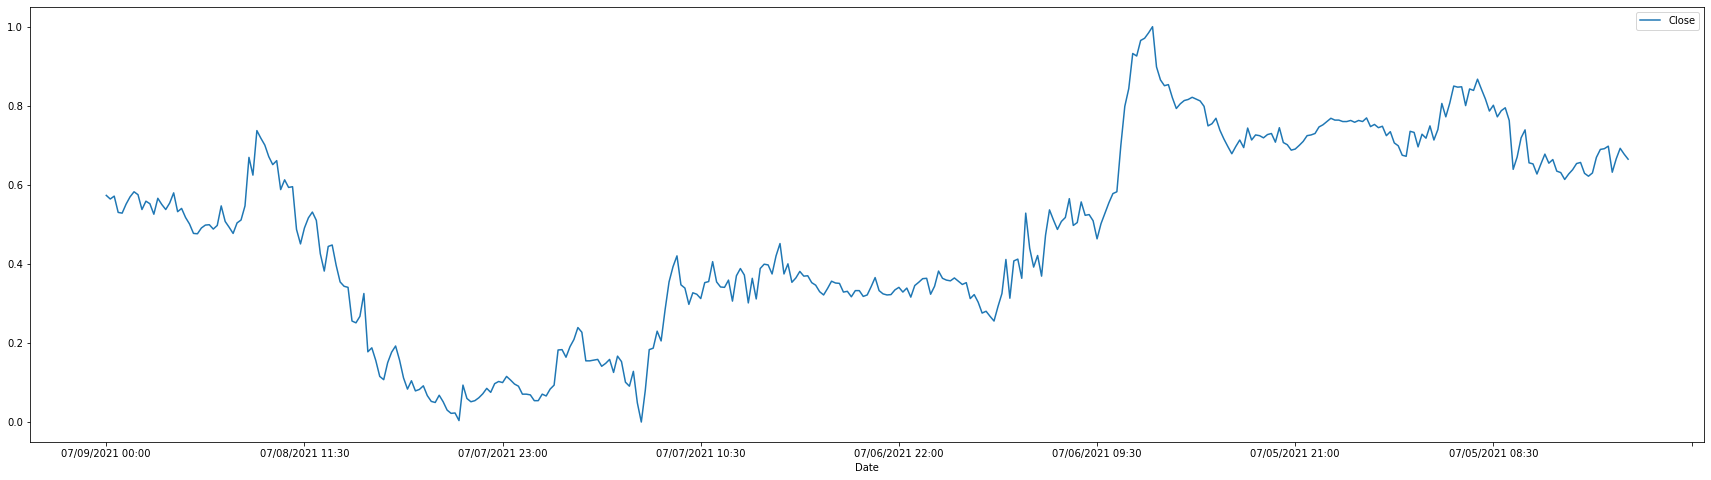

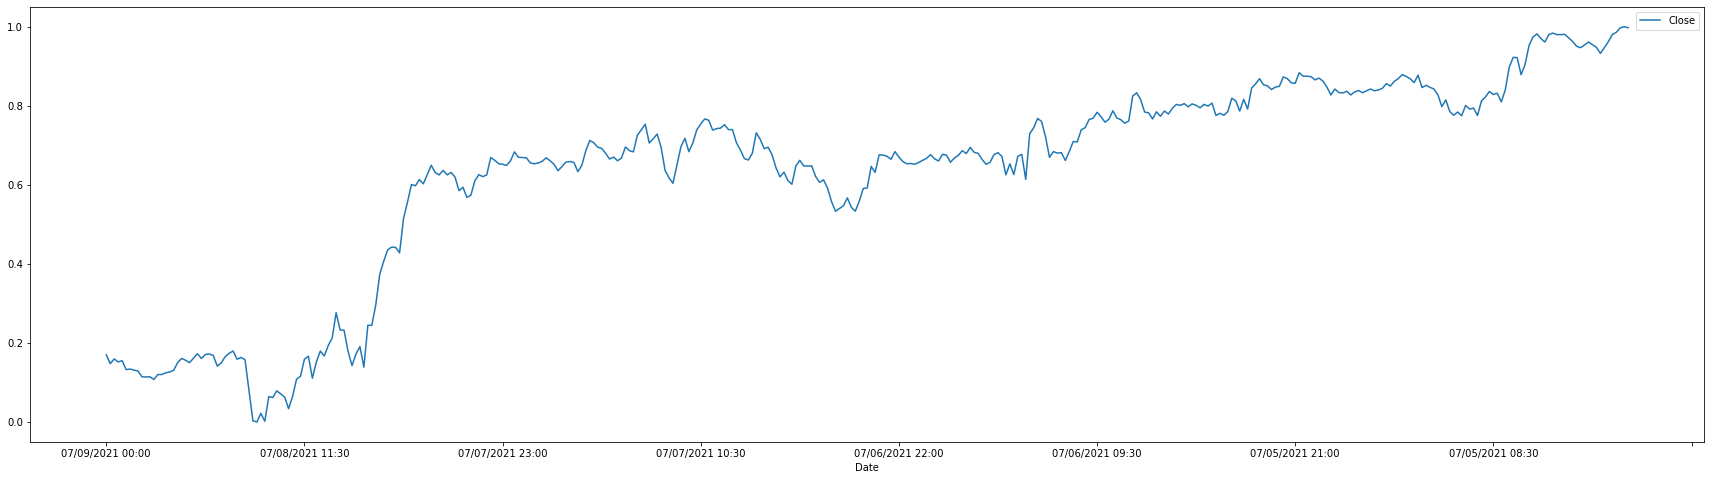

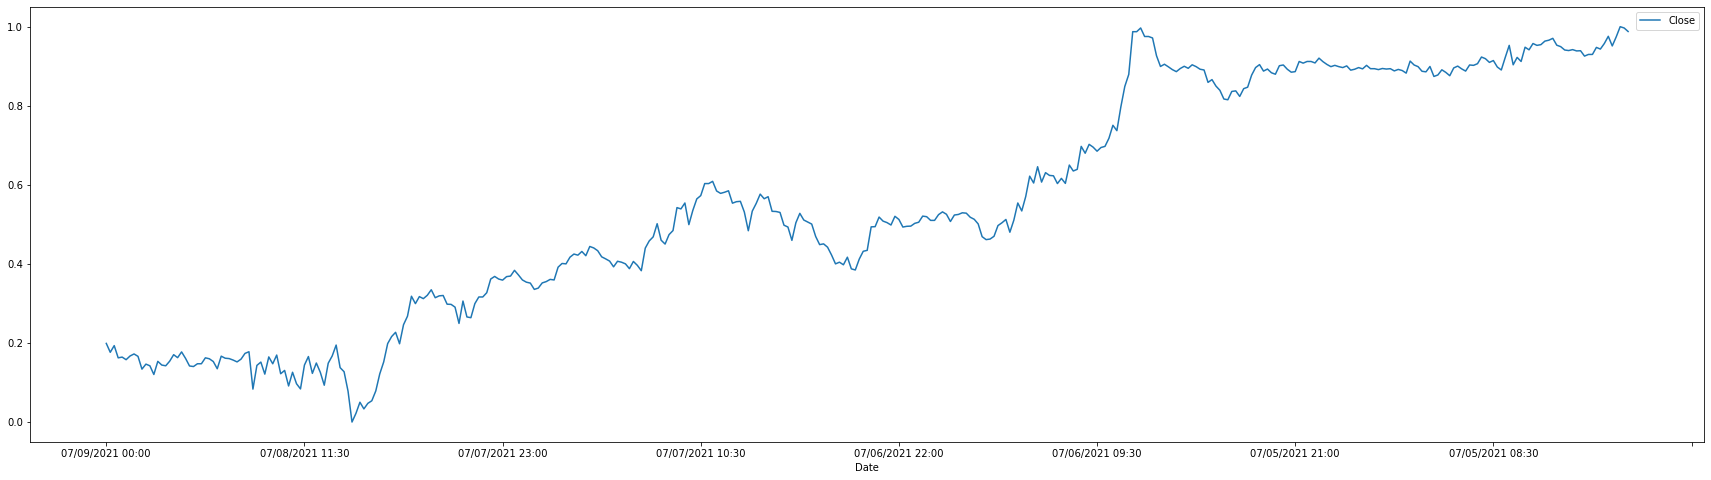

In [ ]:
# graphs of normalized datasets of timeseries data
scaled_cp1.plot(x='Date', y='Close', figsize=(30,8))
scaled_cp2.plot(x='Date', y='Close', figsize=(30,8))
scaled_cp3.plot(x='Date', y='Close', figsize=(30,8))
#normalizing does not affect any standard measurements of a particular time series dataset so graphs are same here but normalizing makes machine learnig easier and model trained with normalized data yields good results and predictions.
#analysis also increses with better insights

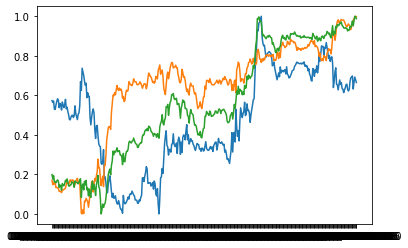

In [ ]:
#ploting three datasets on same graph after normalizing all time series datasets
mtp.plot(scaled_cp1['Date'], scaled_cp1['Close'])
mtp.plot(scaled_cp2['Date'], scaled_cp2['Close'])
mtp.plot(scaled_cp3['Date'], scaled_cp3['Close'])

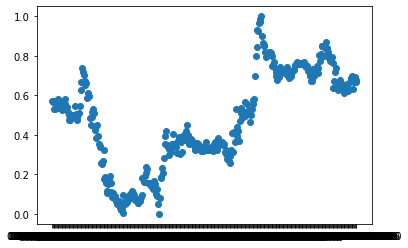

In [ ]:
# going for histogram graph for better analysis after normalizing the time series datasets  
mtp.scatter(scaled_cp1['Date'], scaled_cp1['Close'])

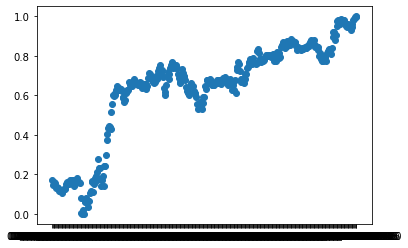

In [ ]:
# going for histogram graph for better analysis after normalizing the time series datasets  
mtp.scatter(scaled_cp2['Date'], scaled_cp2['Close'])

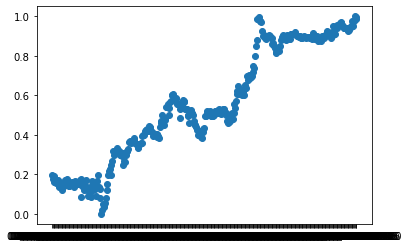

In [ ]:
# going for histogram graph for better analysis after normalizing the time series datasets
mtp.scatter(scaled_cp3['Date'], scaled_cp3['Close'])

## 2.Finding correlations across datasets

In [ ]:
# finding correlations across datasets for particular attribute
# As far as I know, correlations found for attribute "percentage change" gives better insights and better predictions then any other attribute so we shell use percentage change for finding correlations
cp1_pc=cp1['Change(%)']
cp2_pc=cp2['Change(%)']
correlation12=cp1_pc.corr(cp2_pc)
print(correlation12)
# In same way we can calculate correlation between other two datasets for attribute percentage change
cp2_pc=cp2['Change(%)']
cp3_pc=cp3['Change(%)']
correlation23=cp2_pc.corr(cp3_pc)
print(correlation23)
cp1_pc=cp1['Change(%)']
cp3_pc=cp3['Change(%)']
correlation13=cp1_pc.corr(cp3_pc)
print(correlation13)
# We can find correlations between two datasets with respect to other columns like "close" by just replacing "change%" with "close" in above code.

-0.4192349422393249
0.5229031922086627
0.5403890570460831


In [ ]:
# We can also calculate correlations in each respective dataframes or datasets like below:
# calculating with pearson method
correlation_set1=cp1.corr(method='pearson')
print(correlation_set1)
correlation_set2=cp1.corr(method='pearson')
print(correlation_set2)
correlation_set3=cp1.corr(method='pearson')
print(correlation_set3)
# calculating with kendall method
correlation_set1=cp1.corr(method='kendall')
print(correlation_set1)
correlation_set2=cp1.corr(method='kendall')
print(correlation_set2)
correlation_set3=cp1.corr(method='kendall')
print(correlation_set3)
# We have other methods for correlation caluculas in same dataframe with same approach.

                  Open      High       Low     Close  Change(Pips)  Change(%)
Open          1.000000  0.994527  0.993719  0.988856     -0.079152  -0.079218
High          0.994527  1.000000  0.991109  0.994440     -0.005085  -0.005107
Low           0.993719  0.991109  1.000000  0.994602      0.001406   0.000490
Close         0.988856  0.994440  0.994602  1.000000      0.070136   0.069501
Change(Pips) -0.079152 -0.005085  0.001406  0.070136      1.000000   0.996185
Change(%)    -0.079218 -0.005107  0.000490  0.069501      0.996185   1.000000
                  Open      High       Low     Close  Change(Pips)  Change(%)
Open          1.000000  0.994527  0.993719  0.988856     -0.079152  -0.079218
High          0.994527  1.000000  0.991109  0.994440     -0.005085  -0.005107
Low           0.993719  0.991109  1.000000  0.994602      0.001406   0.000490
Close         0.988856  0.994440  0.994602  1.000000      0.070136   0.069501
Change(Pips) -0.079152 -0.005085  0.001406  0.070136      1.0000

In [ ]:
# We have some other methods to find correlation between dataframes along one particular axis either vertical or horizontal using pandas function .corrwith()
# horizontal axis correlation b\w dataframes
print(cp1.corrwith(cp2, axis=0))
print(cp2.corrwith(cp3, axis=0))
print(cp1.corrwith(cp3, axis=0))
# vertical axis correlation b\w dataframes
print(cp1.corrwith(cp2, axis=1))
print(cp2.corrwith(cp3, axis=1))
print(cp1.corrwith(cp3, axis=1))
# NOTE: all above functions for finding correlation in different cases are mentioned as type of correlation to be found is not mentioned in question.
# NOTE: all above functions for finding correlation in different cases can also be calculated from normalized datasets uning scaled_cp1, scaled_cp2, scaled_cp3 instead for cp1, cp2, cp3.

Open            0.245530
High            0.228839
Low             0.260931
Close           0.239999
Change(Pips)   -0.420193
Change(%)      -0.419235
dtype: float64
Open            0.887960
High            0.884723
Low             0.892128
Close           0.887652
Change(Pips)    0.529980
Change(%)       0.522903
dtype: float64
Open            0.663799
High            0.654786
Low             0.667617
Close           0.660038
Change(Pips)    0.543901
Change(%)       0.540389
dtype: float64
0      0.878665
1      0.855206
2     -0.055158
3      0.939196
4      0.661485
         ...   
380    0.654687
381    0.675441
382    0.569162
383    0.683202
384    0.333354
Length: 385, dtype: float64
0      0.999989
1      0.999992
2      0.999834
3      0.999996
4      0.999856
         ...   
380    0.999832
381    0.999903
382    0.999968
383    0.999974
384    0.999944
Length: 385, dtype: float64
0      0.880027
1      0.857033
2     -0.037218
3      0.939425
4      0.673973
         ...   
3

## 3.Ploting graphs and indicating peaks and valleys

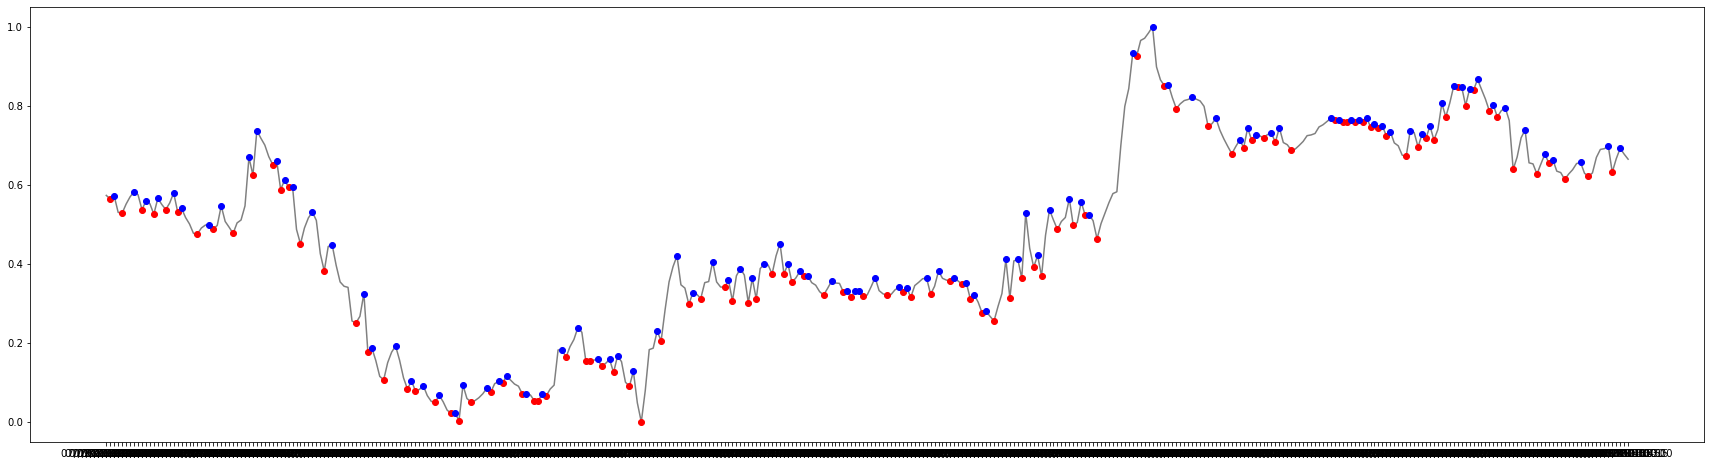

In [ ]:
# ploting graphs of time series datasets is done in cell number 3,and ploting normalized time series datasets is done in cell number 9 and other cells as well.
# indicating peaks and valleys in graphs is either for normalized dataset or without normalized dataset so we indicate peaks and valleys in general dataset:
# converting "close" column in dataframe to numpy array for finding peaks and valleys for all three time series datasetes
cp1_array2=np.array(cp1['Close'])
cp2_array2=np.array(cp2['Close'])
cp3_array2=np.array(cp3['Close'])
# converting "date" column in dataframe to numpy array for finding peaks and valleys for all three time series datasetes
cp1_array1=np.array(cp1['Date'])
cp2_array1=np.array(cp2['Date'])
cp3_array1=np.array(cp3['Date'])
#finding peaks and valleys for first dataset.
#local min
min=(np.diff(np.sign(np.diff(cp1_array2)))>0).nonzero()[0]+1
#local max
max=(np.diff(np.sign(np.diff(cp1_array2)))<0).nonzero()[0]+1
# lets plot
mtp.figure(figsize=(30,8))
mtp.plot(cp1_array1, cp1_array2, color='grey')
mtp.plot(cp1_array1[min],cp1_array2[min], "o", label="min", color='r')
mtp.plot(cp1_array1[max],cp1_array2[max], "o", label="max", color='b')
mtp.show()

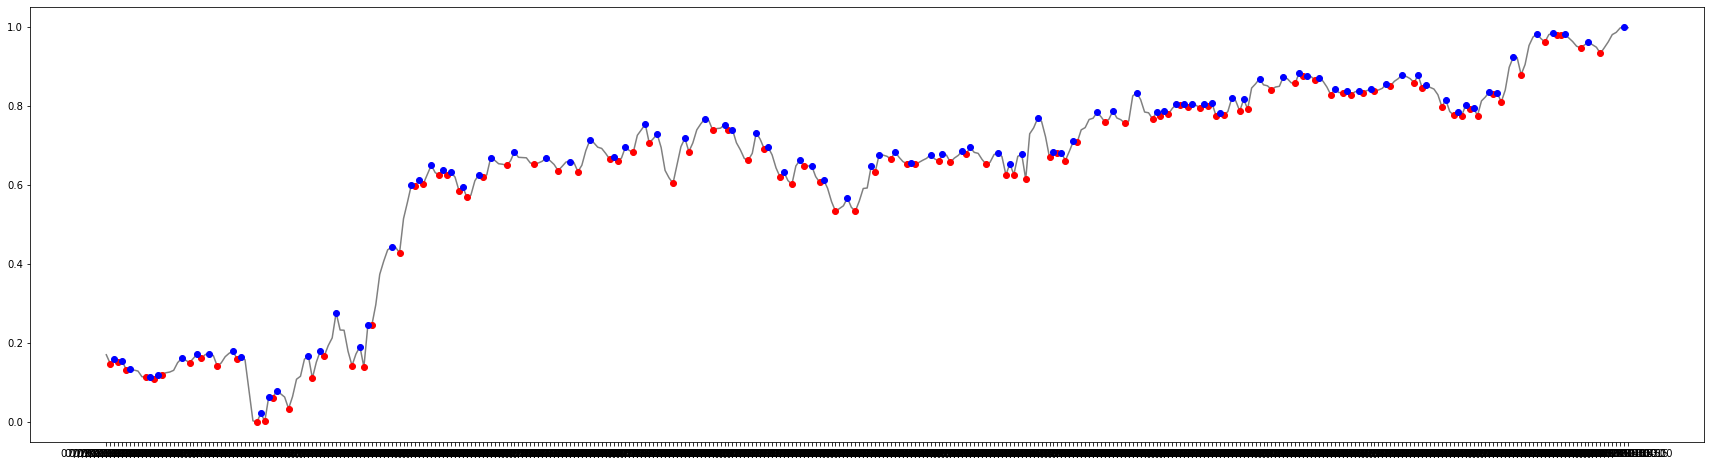

In [ ]:
#finding peaks and valleys for second dataset.
#local min
min=(np.diff(np.sign(np.diff(cp2_array2)))>0).nonzero()[0]+1
#local max
max=(np.diff(np.sign(np.diff(cp2_array2)))<0).nonzero()[0]+1
# lets plot
mtp.figure(figsize=(30,8))
mtp.plot(cp2_array1, cp2_array2, color='grey')
mtp.plot(cp2_array1[min],cp2_array2[min], "o", label="min", color='r')
mtp.plot(cp2_array1[max],cp2_array2[max], "o", label="max", color='b')
mtp.show()

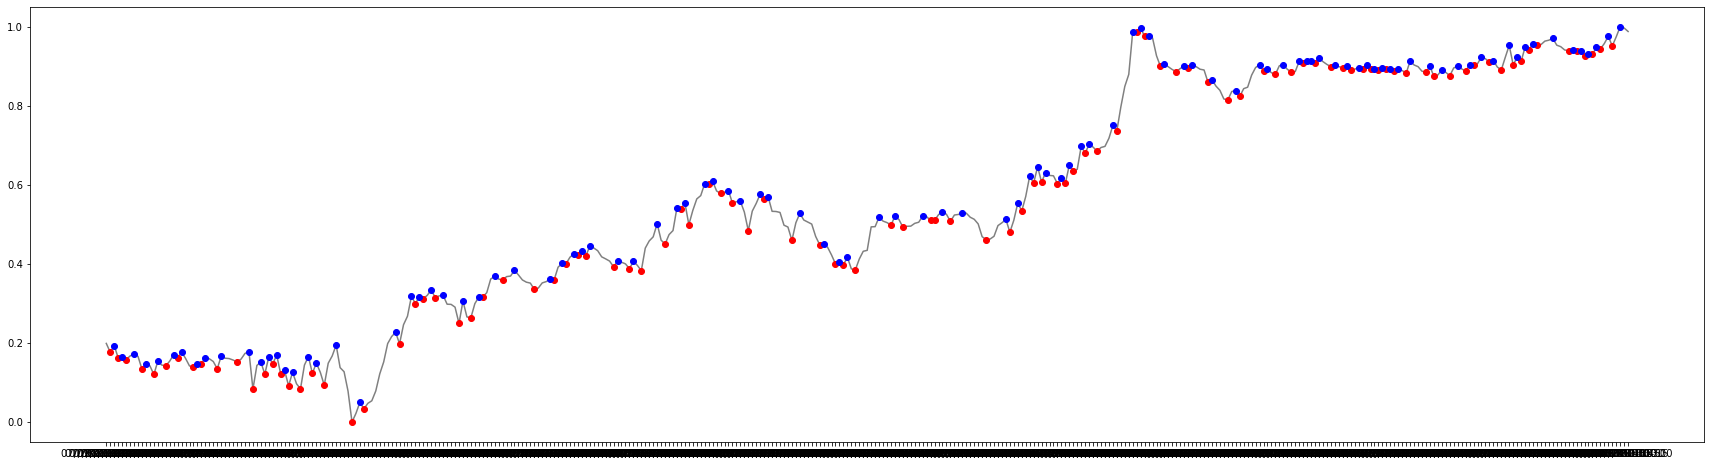

In [ ]:
#finding peaks and valleys for third dataset.
#local min
min=(np.diff(np.sign(np.diff(cp3_array2)))>0).nonzero()[0]+1
#local max
max=(np.diff(np.sign(np.diff(cp3_array2)))<0).nonzero()[0]+1
# lets plot
mtp.figure(figsize=(30,8))
mtp.plot(cp3_array1, cp3_array2, color='grey')
mtp.plot(cp3_array1[min],cp3_array2[min], "o", label="min", color='r')
mtp.plot(cp3_array1[max],cp3_array2[max], "o", label="max", color='b')
mtp.show()

## 4. Finding trend of graphs using machine learning

In [ ]:
# now we use two parameters to define a function for finding trend in datasets using machine learning
# 1.moving average
# 2.bollinger bands
# grouping "date" column and "close" column to one dataframe so that finding trend becomes easy
ts1=cp1.groupby('Date')['Close'].sum()
ts2=cp2.groupby('Date')['Close'].sum()
ts3=cp3.groupby('Date')['Close'].sum()
# defining a function to find trend in dataset
# below we took value of window to be 30 as default, because function yields good results at that value of "window". optimal value of window to be 30 is found upon tuning the model various times at various values.
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,figsize=(30,8)):
    rolling_mean=ts.rolling(window=window).mean()
    rolling_std=ts.rolling(window=window).std()
    mtp.figure(figsize=figsize)    
    mtp.title(ts.name)  
    mtp.plot(ts[window:], label='Actual values', color="black")    
    if plot_ma:
        mtp.plot(rolling_mean, 'g', label='MA'+str(window),color="red")               
    if plot_intervals:
        lower_bound = rolling_mean - (1.96 * rolling_std)
        upper_bound = rolling_mean + (1.96 * rolling_std)
    mtp.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,color='lightskyblue', alpha=0.4)                    
    mtp.legend(loc='best')
    mtp.grid(True)
    mtp.show()
#we know that bollinger bands are two times standard deviation away from rolling mean(to be accurate not two its 1.96).

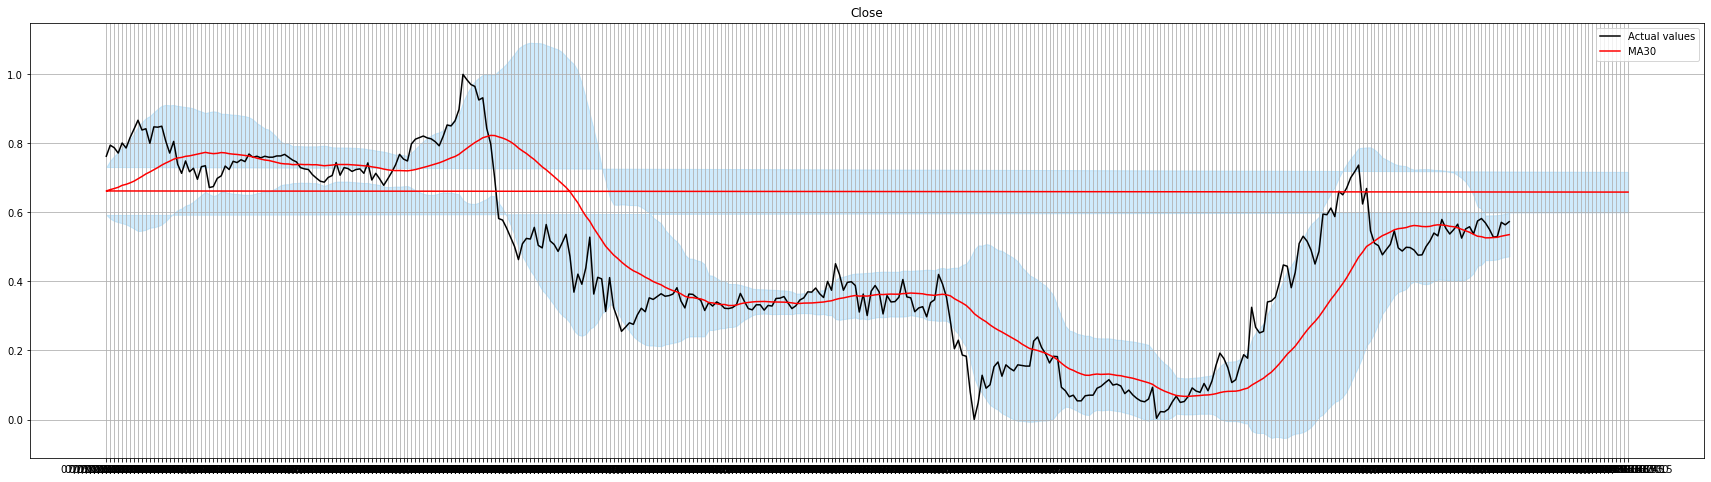

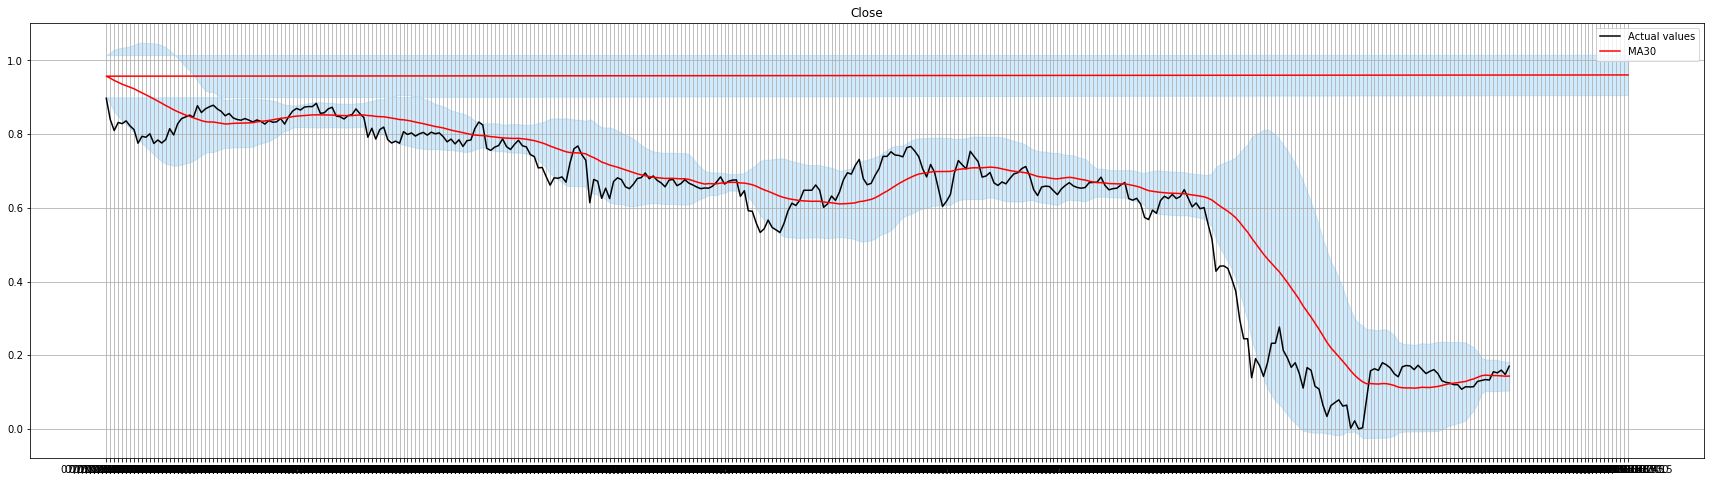

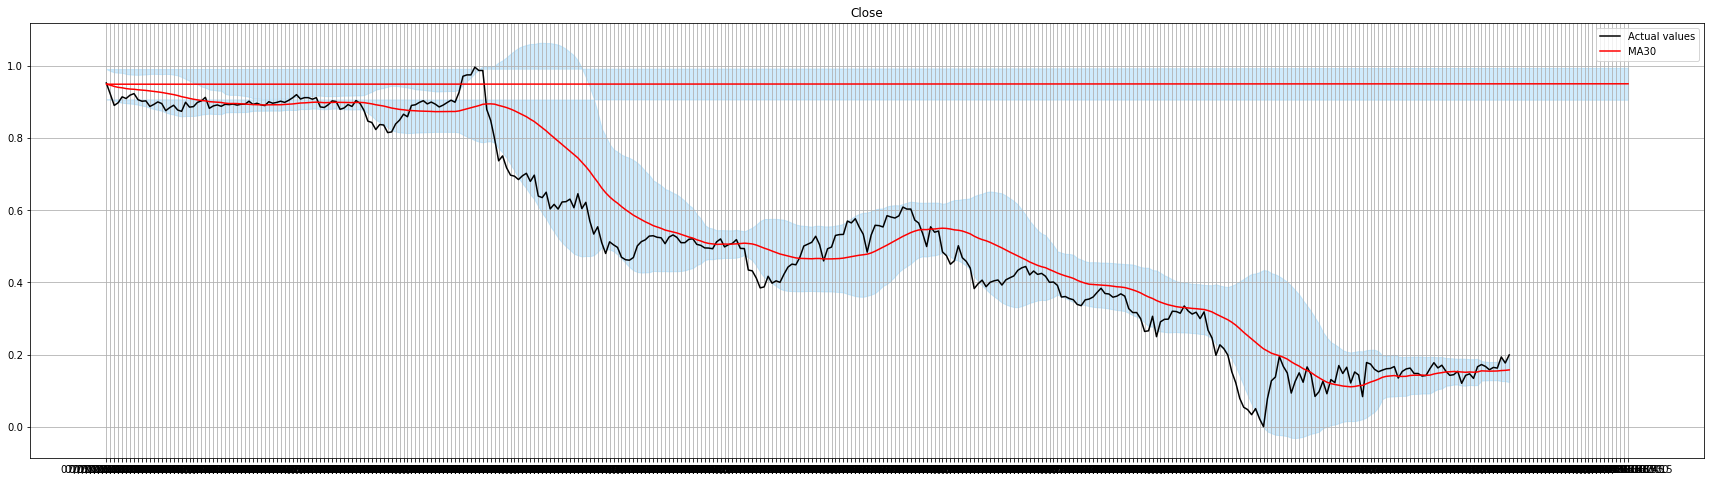

In [ ]:
# we have created a function to find trend in any data
# now we have to use the function plot_ts on all datasetes with "close" column to get the trend with respect to close column
#finding trend in all datasets for time period of 30 days
plot_ts(ts1)
plot_ts(ts2)
plot_ts(ts3)

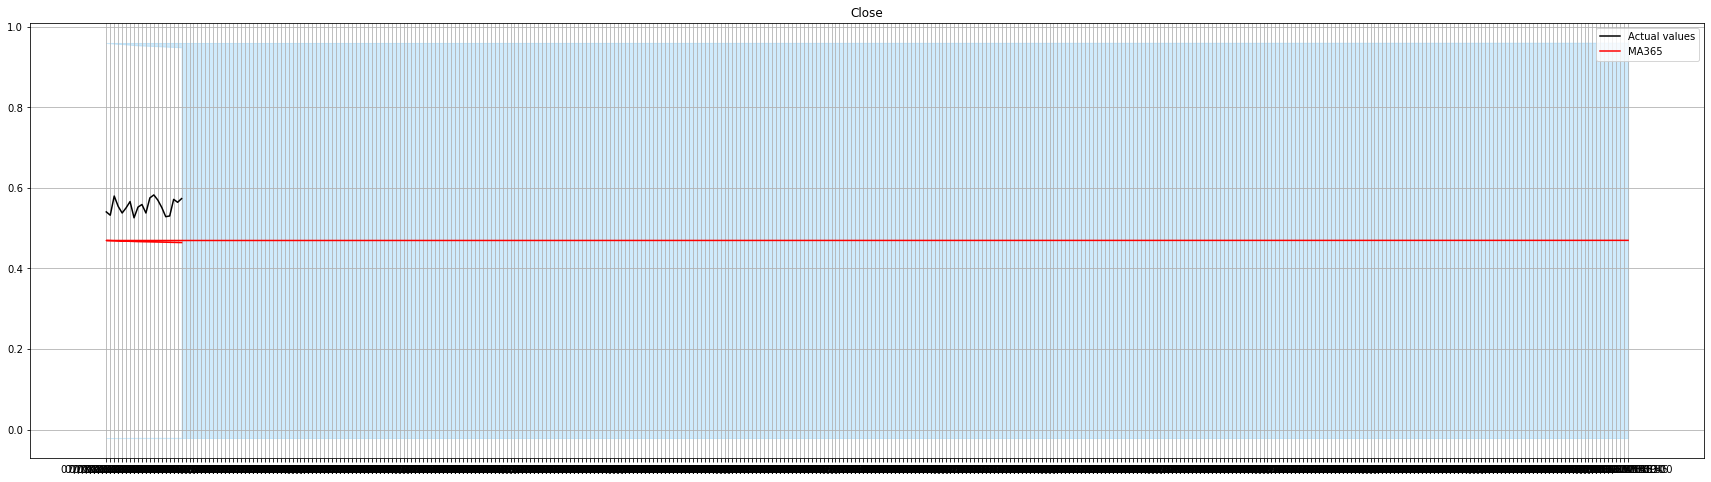

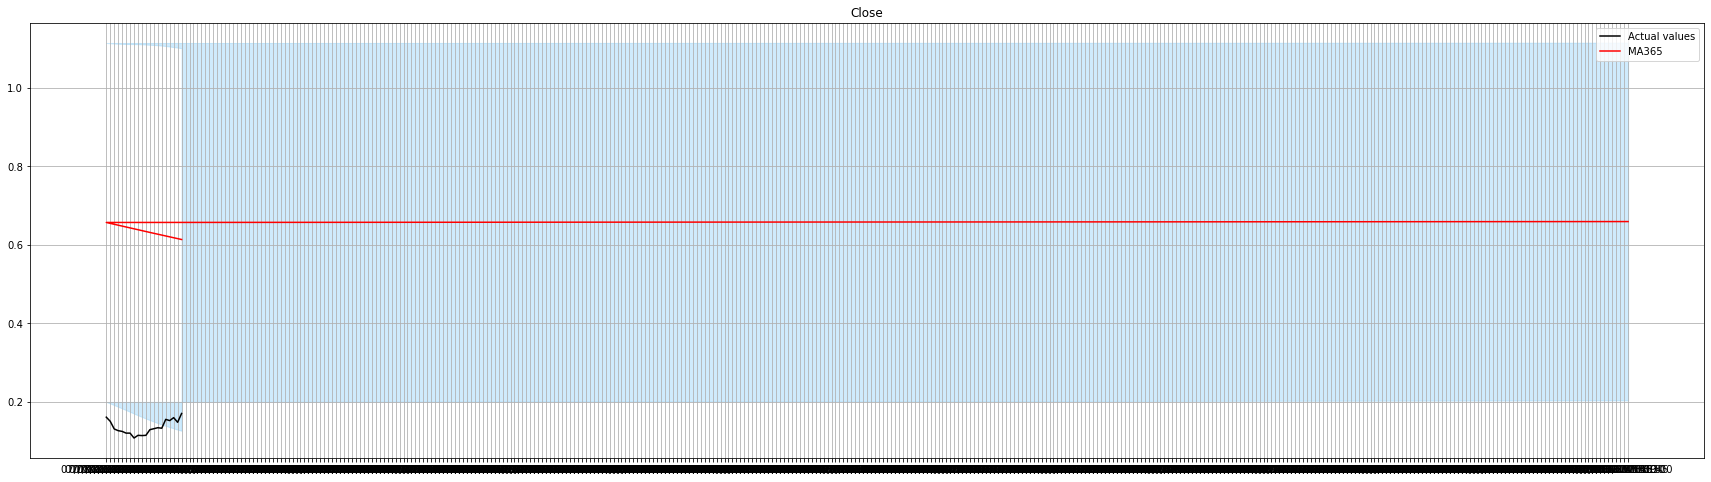

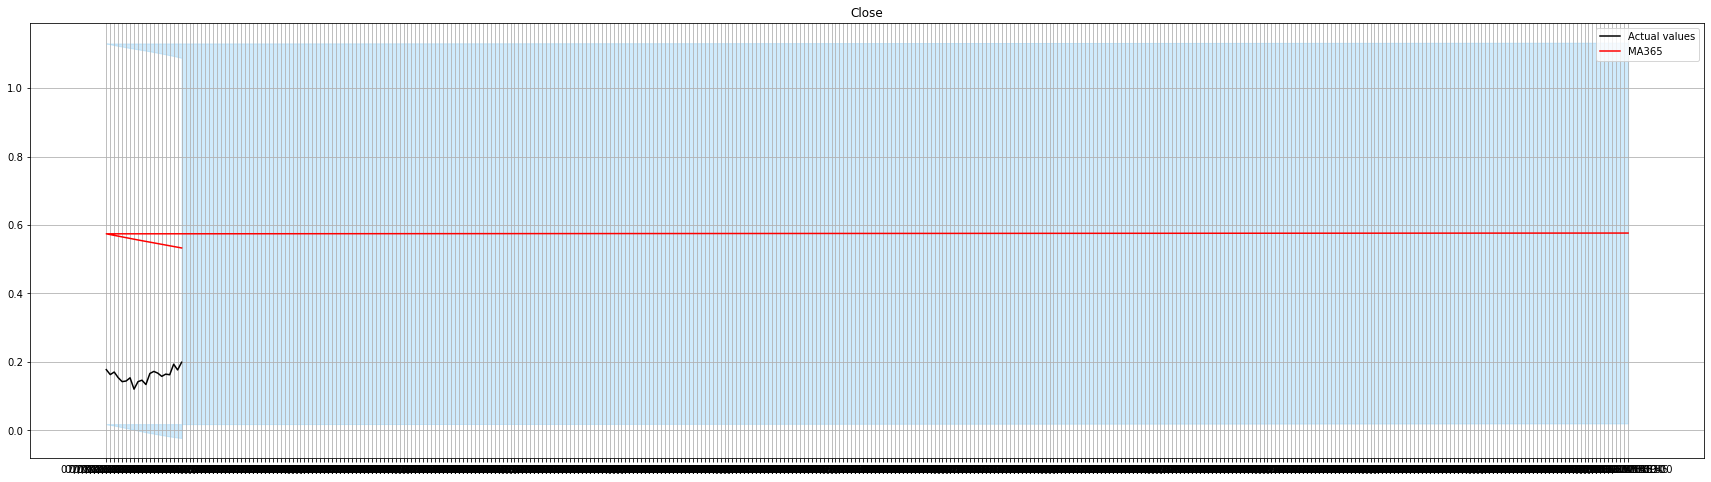

In [ ]:
#finding trend in all datasets for time period of 365 days(actually useless as it does not show any trend)
plot_ts(ts1, window=365)
plot_ts(ts2, window=365)
plot_ts(ts3, window=365)

## 5. Real time solution to time series dataset analysis

In [ ]:
# Answering the question you have asked i.e., you asked pseudo code or details about how my program can analyse the stream of data and how consistently updates the analysis results as new data points become availabe in dataset
# Before to this, I have never given a thought but, after I got inside machine learning, I came to know it.
# to analyze time series dataset and update as new data points available can be done by using pandas datareader function, which reads data points online and we can use those data points for analysis and later can update the results.
# 1. As soon as we get an alert of new data points on dataset board, we use pandas data_reader() to read the dataset.
# 2. After reading the dataset, we check the last data point of pandas data_reader() with the previous dataset, on which anlysis is already done.
# 3. On verification if last data points of datasets proved to be different then we perform all tasks needed to analyze a time series dataset like above and give the final output like,
# correlations, trend, peaks, valleys for latest data points for time series data.

#  This is the end of task assigned
### If there is any thing missing or any thing incomplete, I can complete it before given time, if you intimate me.
###### Thanks for this task